In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
data.shape

(10999, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

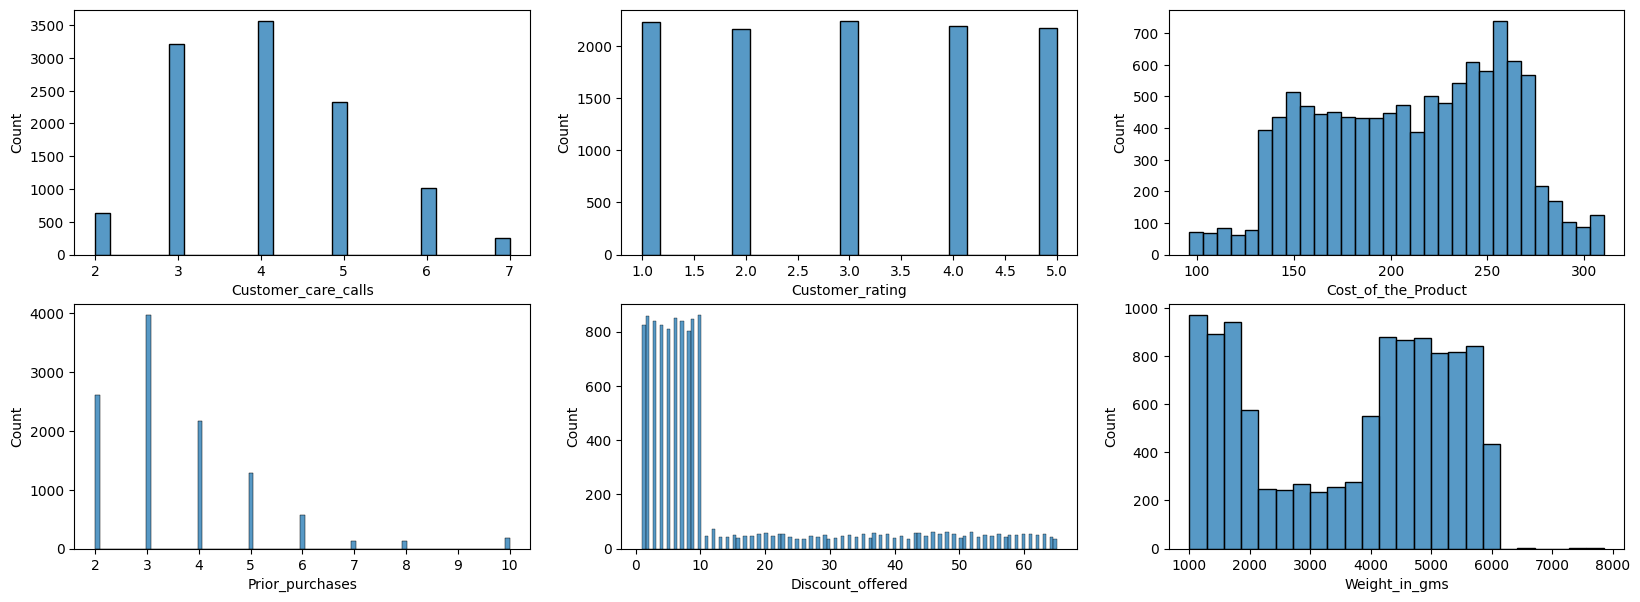

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(2,3,1)
sb.histplot(data['Customer_care_calls'])
plt.subplot(2,3,2)
sb.histplot(data['Customer_rating'])
plt.subplot(2,3,3)
sb.histplot(data['Cost_of_the_Product'])
plt.subplot(2,3,4)
sb.histplot(data['Prior_purchases'])
plt.subplot(2,3,5)
sb.histplot(data['Discount_offered'])
plt.subplot(2,3,6)
sb.histplot(data['Weight_in_gms'])
plt.show()

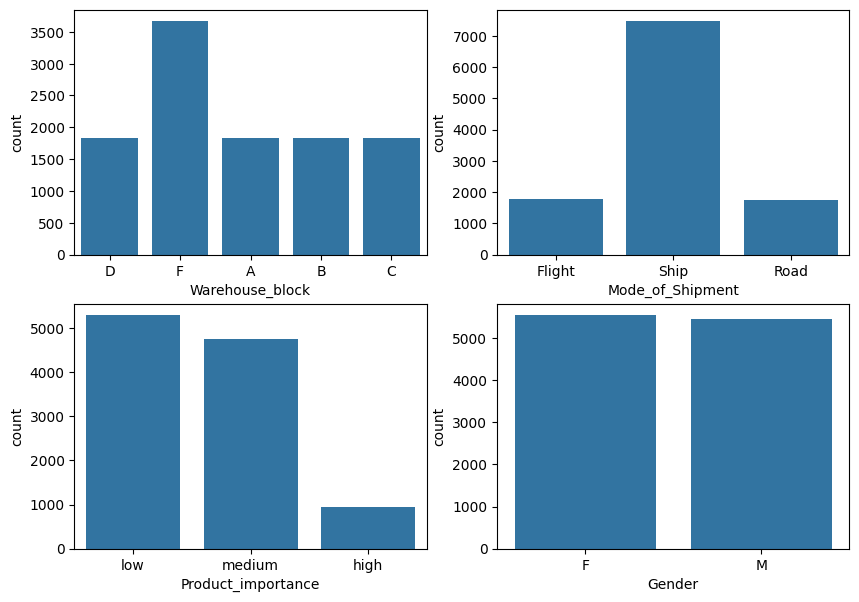

In [9]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sb.countplot(data=data,x=data['Warehouse_block'])
plt.subplot(2,2,2)
sb.countplot(data=data,x=data['Mode_of_Shipment'])
plt.subplot(2,2,3)
sb.countplot(data=data,x=data['Product_importance'])
plt.subplot(2,2,4)
sb.countplot(data=data,x=data['Gender'])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Warehouse_block = le.fit_transform(data.Warehouse_block)
data.Mode_of_Shipment = le.fit_transform(data.Mode_of_Shipment)
data.Product_importance = le.fit_transform(data.Product_importance)
data.Gender = le.fit_transform(data.Gender)
data.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


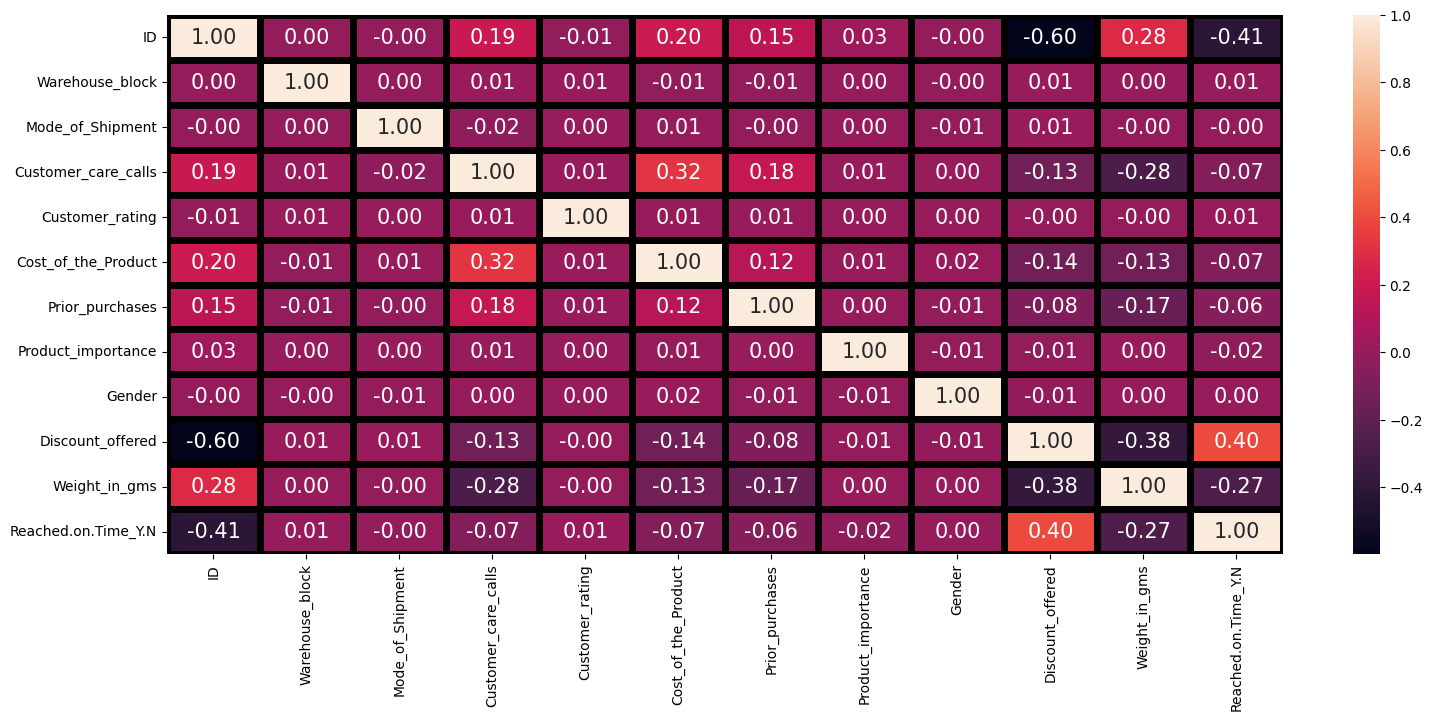

In [11]:
plt.figure(figsize = (18, 7))
sb.heatmap(data.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'black')
plt.show()

In [12]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691
std,3175.28214,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


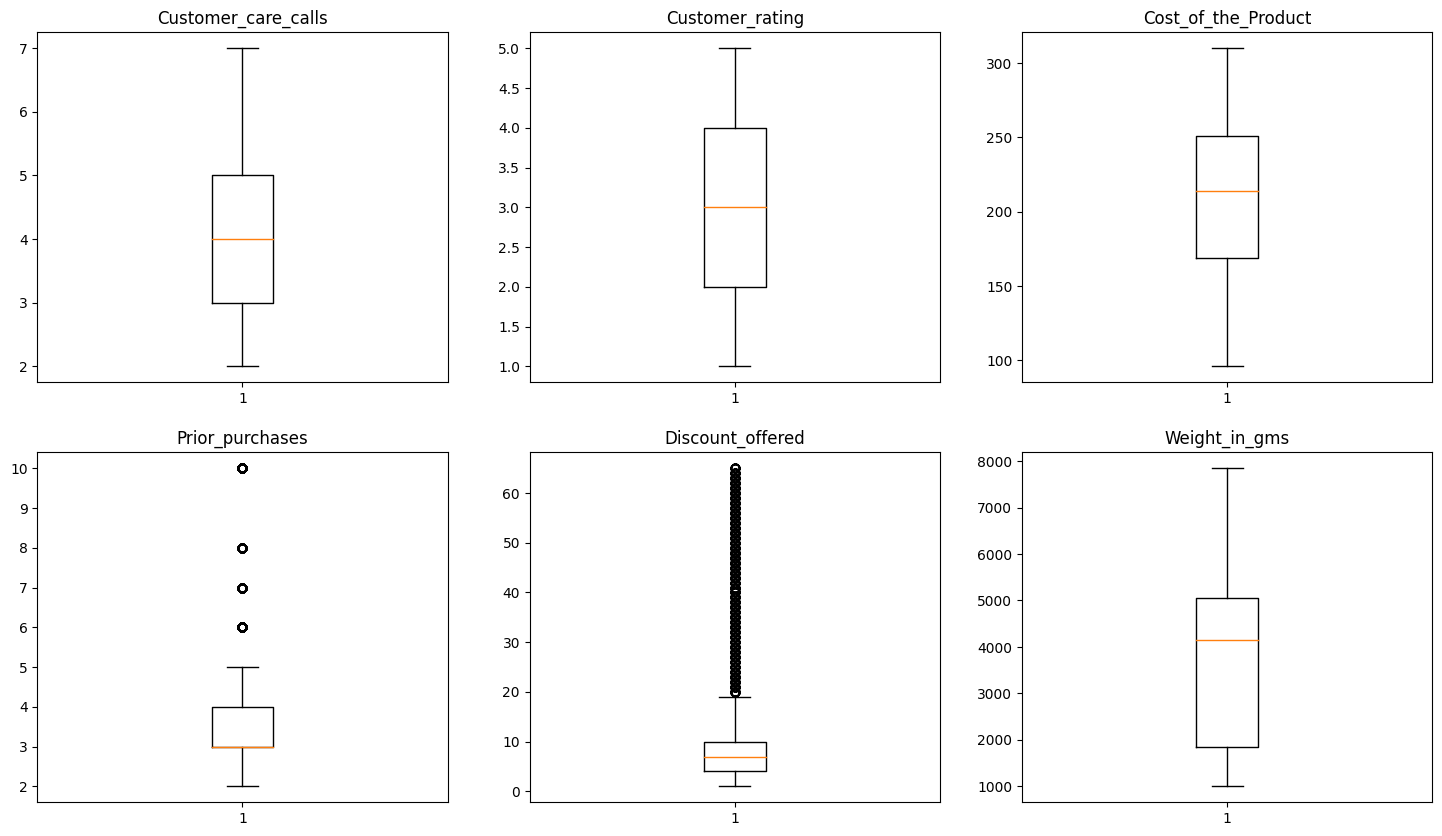

In [13]:
#Visualizing Outliers
c=0
plt.figure(figsize=(18,10))
for i in data.drop(columns=['ID','Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N']).columns:
    if str(data[i].dtype)=='object':
        continue
    plt.subplot(2,3,c+1)
    plt.boxplot(data[i])
    plt.title(i)
    c+=1
plt.show()

In [14]:
categorical_attributes = []
numerical_attributes = []

for col in data.columns[1:-1]:
    if data[col].dtype == 'object':
        categorical_attributes.append(col)
    else:
        numerical_attributes.append(col)
print(f"Categorical attributes: {categorical_attributes}\nNumerical attributes: {numerical_attributes}")

Categorical attributes: []
Numerical attributes: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']


In [15]:
label_map={}
for i in data.columns:
    if str(data[i].dtype) is 'object':
        temp={}
        cats=data[i].unique()
        for index in range(len(cats)):
            temp[cats[index]]=index
        label_map[i]=temp
        #labeling
        data[i]=data[i].map(temp)
label_map

{}

In [16]:
def check_outliers(arr):
    Q1=np.percentile(arr,25,interpolation='midpoint')
    Q3=np.percentile(arr,75,interpolation='midpoint')
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    upper_arr=np.array(arr>=upper)
    print('   ',len(upper_arr[upper_arr==True]),'are over the upper bound:',upper)
    lower=Q1-1.5*IQR
    lower_arr=np.array(arr<=lower)
    print('   ',len(lower_arr[lower_arr==True]),'are less than the lower bound:',lower)
for i in data.drop(columns=['ID','Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Reached.on.Time_Y.N']).columns:
    if str(data[i].dtype)=='object':
        continue
    print(i)
    check_outliers(data[i])

Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0
Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0
Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0
Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5
Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0
Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25


In [17]:
x=data.drop(columns=['ID','Reached.on.Time_Y.N'])
y=data['Reached.on.Time_Y.N']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 10)
(2200, 10)
(8799,)
(2200,)


In [18]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xnorm_train = scale.fit_transform(x_train)
xnorm_test = scale.fit_transform(x_test)

In [19]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
x=norm.fit_transform(x)
x

array([[0.75      , 0.        , 0.4       , ..., 0.        , 0.671875  ,
        0.03389335],
       [1.        , 0.        , 0.4       , ..., 1.        , 0.90625   ,
        0.30489408],
       [0.        , 0.        , 0.        , ..., 1.        , 0.734375  ,
        0.34667641],
       ...,
       [0.5       , 1.        , 0.6       , ..., 0.        , 0.046875  ,
        0.02249817],
       [1.        , 1.        , 0.6       , ..., 1.        , 0.015625  ,
        0.03053324],
       [0.75      , 1.        , 0.        , ..., 0.        , 0.078125  ,
        0.09320672]])

In [20]:
x=data.drop(columns=['ID','Reached.on.Time_Y.N'])
y=data['Reached.on.Time_Y.N']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8799, 10)
(2200, 10)
(8799,)
(2200,)


In [22]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

def model_evaluation(x_train,y_train,x_test,y_test):
    lr=LogisticRegression(random_state=1234)
    lr.fit(x_train,y_train)
    print('LOGISTIC REGRESSION')
    print('Train Score:',lr.score(x_train,y_train))
    print('Test Score:',lr.score(x_test,y_test))
    print()

    lcv=LogisticRegressionCV(random_state=1234)
    lcv.fit(x_train,y_train)
    print('LOGISTIC REGRESSION CV')
    print('Train Score:',lcv.score(x_train,y_train))
    print('Test Score:',lcv.score(x_test,y_test))
    print()

    xgb=XGBClassifier(random_state=1234)
    xgb.fit(x_train,y_train)
    print('XGBOOST')
    print('Train Score:',xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))
    print()

    rc=RidgeClassifier(random_state=1234)
    rc.fit(x_train,y_train)
    print('RIDGE CLASSIFIER')
    print('Train Score:',rc.score(x_train,y_train))
    print('Test Score:',rc.score(x_test,y_test))
    print()

    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    print('K NEIGHBORS CLASSIFIER')
    print('Train Score:',kn.score(x_train,y_train))
    print('Test Score:',kn.score(x_test,y_test))
    print()

    rf=RandomForestClassifier(random_state=1234)
    rf.fit(x_train,y_train)
    print('RANDOM FOREST CLASSIFIER')
    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))
    print()

    svc=svm.SVC(random_state=1234)
    svc.fit(x_train,y_train)
    print('SVM CLASSIFIER')
    print('Train Score:',svc.score(x_train,y_train))
    print('Test Score:',svc.score(x_test,y_test))
    print()

    return lr,lcv,xgb,rc,kn,rf,svc


In [23]:
lr,lcv,xgb,rc,kn,rf,svc = model_evaluation(xnorm_train,y_train,xnorm_test,y_test)

LOGISTIC REGRESSION
Train Score: 0.6416638254347085
Test Score: 0.6404545454545455

LOGISTIC REGRESSION CV
Train Score: 0.6446187066712127
Test Score: 0.6386363636363637

XGBOOST
Train Score: 0.9136265484714172
Test Score: 0.6463636363636364

RIDGE CLASSIFIER
Train Score: 0.6529151039890897
Test Score: 0.6468181818181818

K NEIGHBORS CLASSIFIER
Train Score: 0.7734969882941243
Test Score: 0.634090909090909

RANDOM FOREST CLASSIFIER
Train Score: 1.0
Test Score: 0.6522727272727272

SVM CLASSIFIER
Train Score: 0.7053074212978747
Test Score: 0.6636363636363637



In [24]:
def eval(name,model):
    y_pred=model.predict(xnorm_test)
    result=[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(f1_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(recall_score(y_test,y_pred)*100))
    result.append("{:.2f}".format(precision_score(y_test,y_pred)*100))
    return result
model_list={
    'logistic regression':lr,
    'logistic regression CV':lcv,
    'XGBoost':xgb,
    'ridge classifier':rf,
    'knn':kn,
    'random forest':rf,
    'support vector classifier':svc
}
model_eval_info=[]
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info=pd.DataFrame(model_eval_info,columns=['Name','Accuracy','F1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,F1_score,Recall,Precision
0,logistic regression,64.05,69.61,69.48,69.75
1,logistic regression CV,63.86,70.32,72.24,68.51
2,XGBoost,64.64,70.42,71.01,69.83
3,ridge classifier,65.23,68.76,64.57,73.54
4,knn,63.41,68.71,67.79,69.66
5,random forest,65.23,68.76,64.57,73.54
6,support vector classifier,66.36,66.24,55.67,81.76


In [25]:
comp_data=pd.read_csv('model_eval.csv')
comp_data

,Unnamed: 0,Name,Accuracy,F1_score,Recall,Precision
0,0,logistic regression,64.05,69.61,69.48,69.75
1,1,logistic regression CV,63.86,70.32,72.24,68.51
2,2,XGBoost,64.64,70.42,71.01,69.83
3,3,ridge classifier,65.23,68.76,64.57,73.54
4,4,knn,63.41,68.71,67.79,69.66
5,5,random forest,65.23,68.76,64.57,73.54
6,6,support vector classifier,66.36,66.24,55.67,81.76


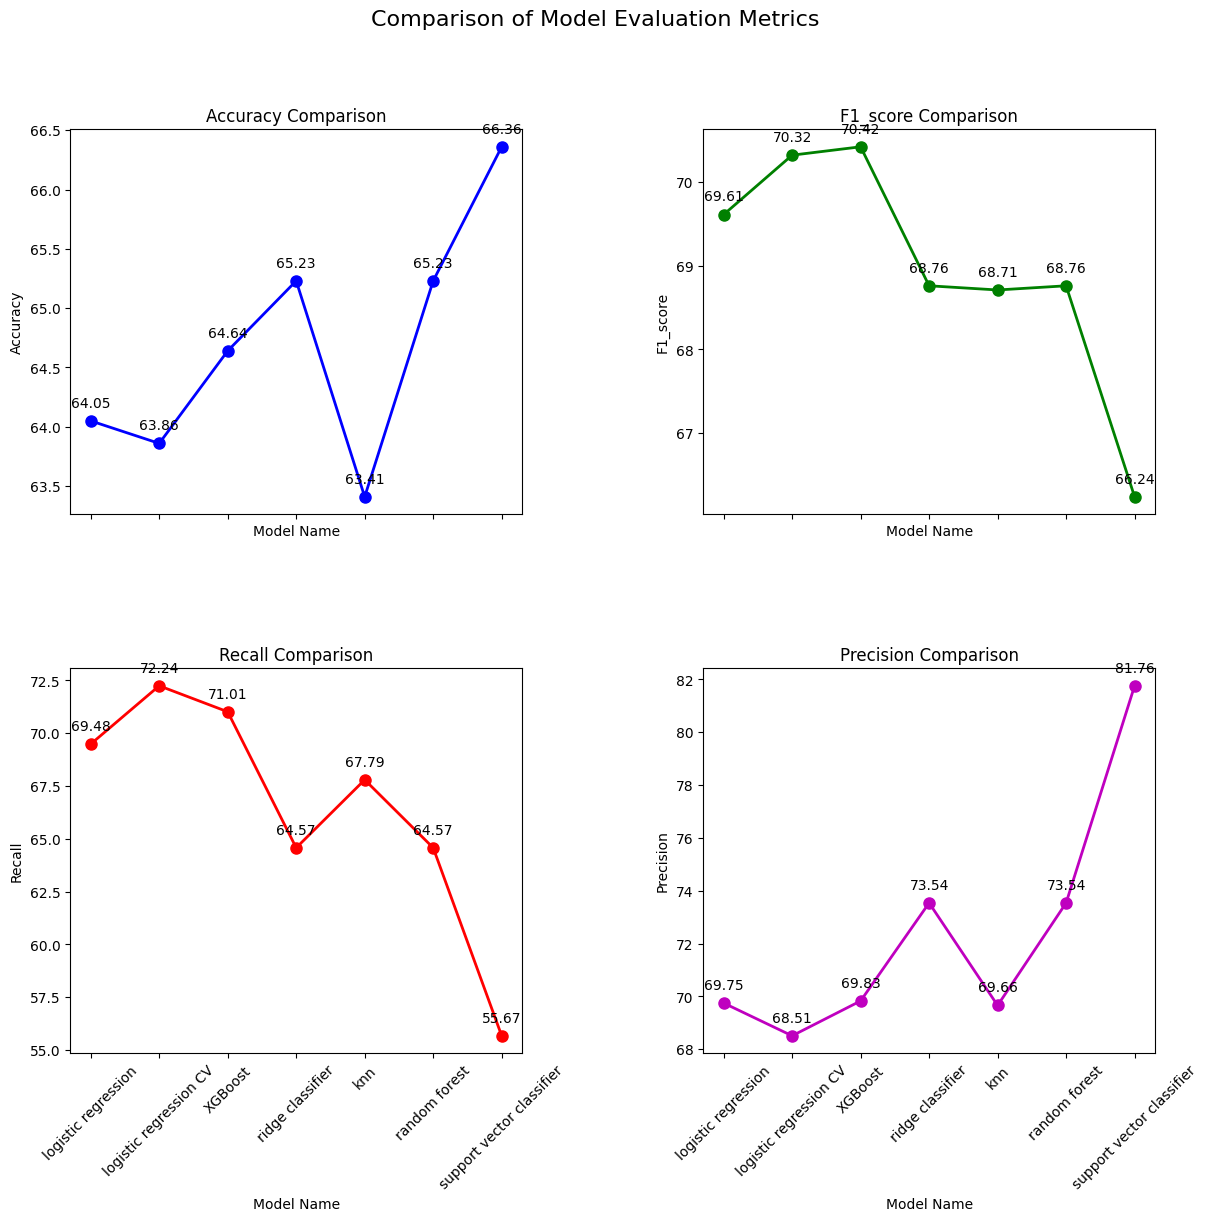

In [26]:
metrics = ['Accuracy', 'F1_score', 'Recall', 'Precision']
colors = ['b', 'g', 'r', 'm']

# Set plot size and style
fig, axs = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    ax.plot(comp_data['Name'], comp_data[metric], marker='o', color=colors[i], linestyle='-', linewidth=2, markersize=8)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Model Name')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    for j in range(len(comp_data)):
        ax.annotate(f'{comp_data[metric][j]:.2f}', (comp_data['Name'][j], comp_data[metric][j]), textcoords="offset points", xytext=(0,10), ha='center')

# Set the main title
fig.suptitle('Comparison of Model Evaluation Metrics', fontsize=16)

# Show the plot
plt.show()

In [28]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Load dataset
ecomm = pd.read_csv("Train.csv")

# Rename columns
cols=[]
for i in ecomm.columns[1:-1]:
    i = i.lower()
    cols.append(i);
cols = ['ID'] +  cols
cols.append('arrival')
ecomm.columns = cols

# Data preprocessing
ecomm['gender'] = ecomm.gender.map({'F':0, 'M':1})
ecomm['customer_rating'] = ecomm['customer_rating'].map({5:0, 4:0, 3:0, 2:0, 1:1})
dummy = pd.DataFrame(pd.get_dummies(ecomm[['warehouse_block', 'mode_of_shipment','product_importance']]))
ecomm1 = pd.DataFrame(scale(ecomm[['cost_of_the_product','weight_in_gms','discount_offered']]),
                      columns=['cost_of_the_product','weight_in_gms','discount_offered'])
ecomm_final = pd.concat([ecomm1,dummy,ecomm[['customer_care_calls', 'prior_purchases','gender', 'arrival','customer_rating']]],
                        axis=1)

# Split data into output and input
X = ecomm_final.iloc[:,:-1] # inputs
Y = ecomm_final['customer_rating'] # outputs

# Model building
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
KNN_model.fit(X, Y)

# Save the model
filename = 'final.pkl'
pickle.dump(KNN_model, open(filename, 'wb'))